# Data
This ML model uses the following parameters from the dataset for training he model.

* mid - match id
* date - when matches are played
* venue - place where matches aew played
* bat_team - batting team
* bowl_team - bowling team
* batsman - batsman
* bowler - bowler
* runs - runs scored
* wickets - wickets
* overs - overs - next 3 are based on this
* run_last_5 - runs scored  in last 5 overs
* wicket_last_5 - wickets in last 5 overs
* stricker - batsman playing as main 1
* non-striker - batsman playing as runner up - not main 0
* total - total score **(target variable)**

# First Innings Score Predictions

In [ ]:
# dependecies
import pandas as pd
import pickle


# loading dataset
df = pd.read_csv('ipl.csv')
df.head(2)

# EDA

In [ ]:
#checking shape of data
df.shape

(76014, 15)

In [ ]:
# check null values and then sum it up
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [ ]:
# Check summary stats using df.describe()
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

<Axes: >

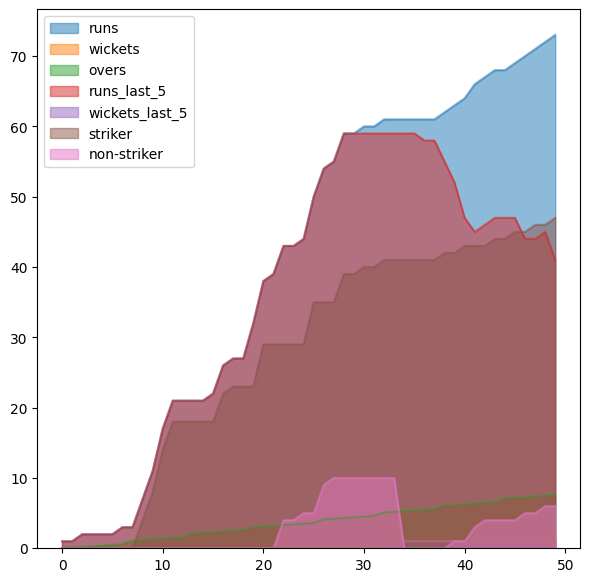

In [ ]:
# plot area / contributions in dataset
df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']][:50].plot(kind = 'area', figsize = (7,7), stacked = False)

# Data Cleaning

In [ ]:
# Removing unwanted cols - reduce memory size
cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)


In [ ]:
#corss check
df.head(3)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222


In [ ]:
df.shape

(76014, 9)

In [ ]:
# checking for how many batting teams are there
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
# only keep current team which are present
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [ ]:
# filtering based on consistency
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
# printing out unique team after filtering
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [ ]:
# since for every match one can predict more accurately if one has 5 over data so,
# filtering based on 5 overs
df = df[df['overs']>=5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [ ]:
# getting data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.1+ MB


In [ ]:
# converting date cols from string to date time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [ ]:
df['date'].dtype

dtype('<M8[ns]')

# Data Processing

In [ ]:
# converting categorical features using 'One Hot Encoding' # for numerical values
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])

In [ ]:
cat_df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# getting cols
cat_df.columns 

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [ ]:
# rearranging cols
cat_df = cat_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]

In [ ]:
# split the data into train and test - based on date column
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

In [ ]:
# since only one column so cosidered as series
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

In [ ]:
#checking shape
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(37330, 22) (37330,)
(2778, 22) (2778,)


In [ ]:
# since the requirement of our date colum is over so we can drop it
# dropping date column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

In [ ]:
# use display to cross check in single line
display("X_train", X_train.head(1))
display("X_test", X_test.head(1))
print(X_test)


'X_train'

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,0,5.1,59,0


'X_test'

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
68894,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,46,1,5.1,42,1


       bat_team_Chennai Super Kings  bat_team_Delhi Daredevils  \
68894                             0                          0   
68895                             0                          0   
68896                             0                          0   
68897                             0                          0   
68898                             0                          0   
...                             ...                        ...   
75884                             0                          0   
75885                             0                          0   
75886                             0                          0   
75887                             0                          0   
75888                             0                          0   

       bat_team_Kings XI Punjab  bat_team_Kolkata Knight Riders  \
68894                         0                               0   
68895                         0                               0   
68896 

# Model Building
- Building model 
- Saving Model Using Pickle

## Linear Regression Model

In [ ]:
# intial buid 
# import module
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# trainong model
reg.fit(X_train , y_train)

LinearRegression()

# Predictions
Evaluating Our Model

In [ ]:
# getting predictions
prediction = reg.predict(X_test)
print(prediction)
print(X_test.shape)
# print(X_test)

[172.07093429 175.2197967  174.61607874 ... 100.37504751  99.80473879
  93.14382211]
(2778, 21)


<ipython-input-48-a8d77a56fcb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: ylabel='Density'>

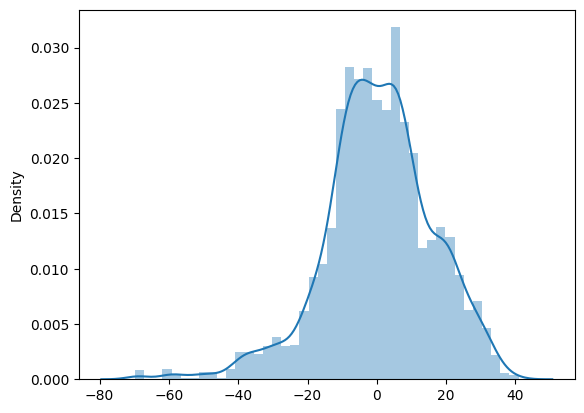

In [ ]:
# plottoing our fit
import seaborn as sns
sns.distplot(y_test-prediction)

In [ ]:
# checking for scores
from sklearn import metrics
import numpy as np # dependency

# print("accuracy = ",metrics.accuracy_score(y_test, prediction))
print("ytest = ",y_test)
print("predictio = ",prediction)

# Mean Absolute Error
print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error  
print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

ytest =  [207 207 207 ... 107 107 107]
predictio =  [172.07093429 175.2197967  174.61607874 ... 100.37504751  99.80473879
  93.14382211]
MAE:  12.118617546193295
MSE:  251.00792310417438
RMSE:  15.843229566732106


In [ ]:
# creating our model pickel file - saving model
file_name = 'ipl_score_predict_model.pkl'
pickle.dump(reg , open(file_name,'wb'))

In [54]:
print("accuracy of this model = ",reg.score(X_test,y_test))

bat=[0,0,0,0,0,0,0,0]
bowl=[0,0,0,0,0,0,0,0]
print("Consider the number for the IPL teams:")
print("1.CSK	2.DC	3.Kings XI Punjab	4.KKR	5.MI	6.RR 7.RCB	8.SRH")
batting=int(input("Enter batting team number = "))
bowling=int(input("Enter bowling team number = "))
bat[batting]=1
bowl[bowling]=1
x_val=[]
x_val=bat
x_val=x_val+bowl
runs=int(input("Enter runs scored till now = "))	
wickets=int(input("Enter wickets scored till now = "))	
overs=int(input("Enter overs till now= "))	
runs_last_5=int(input("Enter runs in last five overs= "))	
wickets_last_5=int(input("Enter wickets in last five overs= "))
x_val.append(runs)
x_val.append(wickets)
x_val.append(overs)
x_val.append(runs_last_5)
x_val.append(wickets_last_5)
x=[]
x.append(x_val)
# print(x_val)
pred = reg.predict(x)
print("runs scored in this match = ",pred)




accuracy of this model =  0.7522633566350527
Consider the number for the IPL teams:
1.CSK	2.DC	3.Kings XI Punjab	4.KKR	5.MI	6.RR 7.RCB	8.SRH
Enter batting team number = 1
Enter bowling team number = 5
Enter runs scored till now = 60
Enter wickets scored till now = 1
Enter overs till now= 7
Enter runs in last five overs= 50
Enter wickets in last five overs= 1
runs scored in this match =  [170.07707331]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
